In [9]:
import pandas as pd
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

In [10]:
df_bp = df[['INCDATE','SEVERITYCODE']]
df_bp['INCDATE'] = pd.to_datetime(df_bp['INCDATE'])
df_bp['YEAR']=df_bp['INCDATE'].dt.year
df_bp['YEAR'] = df_bp['YEAR'].astype(str).replace('\.0', '', regex=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [12]:
df_bp.drop(['INCDATE'],axis=1,inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


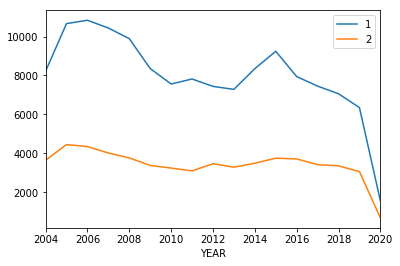

In [13]:
ctdf = df_bp.reset_index().groupby(['YEAR','SEVERITYCODE'], as_index=False).count().rename(columns={'index':'COUNT'})

from matplotlib import pyplot as plt
fig, ax = plt.subplots()

for key, data in ctdf.groupby('SEVERITYCODE'):
    data.plot(x='YEAR', y='COUNT', ax=ax, label=key)